<a href="https://colab.research.google.com/github/chopadeabhishek/Logistics-Delivery-Performance-Analysis/blob/main/Delhivery_featureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Engineering : Delhivery**

## **Introduction**

### **About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**Columns Description :**

    1. data - tells whether the data is testing or training data
    2. trip_creation_time – Timestamp of trip creation
    3. route_schedule_uuid – Unique Id for a particular route schedule
    4. route_type – Transportation type
        - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
        - Carting: Handling system consisting of small vehicles (carts)
    5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
    6. source_center - Source ID of trip origin
    7. source_name - Source Name of trip origin
    8. destination_cente – Destination ID
    9. destination_name – Destination Name
    10. od_start_time – Trip start time
    11. od_end_time – Trip end time
    12. start_scan_to_end_scan – Time taken to deliver from source to destination
    13. is_cutoff – Unknown field
    14. cutoff_factor – Unknown field
    15. cutoff_timestamp – Unknown field
    16. actual_distance_to_destination – Distance in Kms between source and destination warehouse
    17. actual_time – Actual time taken to complete the delivery (Cumulative)
    18. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
    19. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
    20. factor – Unknown field
    21. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
    22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
    23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
    24. segment_factor – Unknown field



**Problem Statement :**

The company wants to understand and process the data coming out of data engineering pipelines:

- Clean, sanitize and manipulate data to get useful features out of raw fields.

- Make sense out of the raw data and help the data science team to build forecasting models on it.



**Concept Used:**

- Feature Creation
- Relationship between Features
- Column Normalization /Column Standardization
- Handling categorical values
- Missing values - Outlier treatment / Types of outliers


<div style="page-break-after: always;"></div>

## **Importing the necessary libraries**

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Hypothesis testing
from scipy.stats import shapiro, ttest_rel, mannwhitneyu

# Suppress warnings that might be generated during execution
import warnings
warnings.filterwarnings('ignore')

## **Exploratory Data Analysis**

### **Importing Dataset, basic exploration & Datatype corrections**

In [2]:
!gdown 1rPLu9LCMu8zwvEo2i1Xa4vRy4bo3VIlB

Downloading...
From: https://drive.google.com/uc?id=1rPLu9LCMu8zwvEo2i1Xa4vRy4bo3VIlB
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 59.6MB/s]


In [3]:
df = pd.read_csv("delhivery_data.csv")

In [4]:
df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
96429,training,2018-09-12 15:32:55.571006,thanos::sroute:0456b740-1dad-4929-bbe0-87d8843...,FTL,trip-153676637557074618,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-12 15:32:55.571006,...,2018-09-14 15:47:27,180.291177,291.0,184.0,206.8886,1.581522,30.0,19.0,26.4152,1.578947
81835,training,2018-09-18 05:52:34.754990,thanos::sroute:bf08d208-b425-4f49-a0a1-f91305f...,Carting,trip-153724995475473745,IND560002AAA,Bengaluru_KHRoad_I (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-18 05:52:34.754990,...,2018-09-18 06:11:24,17.296073,55.0,21.0,17.8210,2.619048,34.0,9.0,8.0254,3.777778
7996,test,2018-10-01 18:10:18.254901,thanos::sroute:10475d85-2efb-4a42-9cd8-2114309...,FTL,trip-153841741825452715,IND313001AAB,Udaipur_Mangri_I (Rajasthan),IND306401AAB,Pali_Nayagaon_I (Rajasthan),2018-10-02 04:38:59.613475,...,2018-10-02 09:22:13,44.013418,68.0,39.0,55.7302,1.743590,32.0,18.0,25.9905,1.777778
17413,test,2018-09-27 04:30:39.369941,thanos::sroute:3c657b6b-38e9-437f-a02f-1cd0a27...,FTL,trip-153802263936969812,IND110037AAM,Delhi_Airport_H (Delhi),IND282001AAA,Agra_Idgah_P (Uttar Pradesh),2018-09-27 04:30:39.369941,...,2018-09-27 08:18:34,169.822921,306.0,148.0,202.1672,2.067568,58.0,27.0,25.6724,2.148148
127729,training,2018-09-22 22:20:31.270185,thanos::sroute:bcce7b68-e962-4a29-af24-167e3e9...,FTL,trip-153765483126993361,IND781018AAB,Guwahati_Hub (Assam),IND110037AAM,Delhi_Airport_H (Delhi),2018-09-22 22:20:31.270185,...,2018-09-23 02:23:25,1431.234060,3127.0,1272.0,1748.2257,2.458333,51.0,19.0,27.6107,2.684211


In [5]:
print(f"The Delhivery dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.\nThe shape of the resulting dataframe is {df.shape}.")

The Delhivery dataset consists of 144867 rows and 24 columns.
The shape of the resulting dataframe is (144867, 24).


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
# From the dataset description, we have know that some columns are unknown to us and thus can be removed.

unknown_columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df.drop(columns = unknown_columns, inplace=True)

In [8]:
df.sample(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
139094,test,2018-10-01 02:14:05.152623,thanos::sroute:870bead8-6c8a-458f-b4d8-658de44...,FTL,trip-153836004515233815,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND834002AAB,Ranchi_Hub (Jharkhand),2018-10-01 02:14:05.152623,2018-10-02 12:31:14.279975,2057.0,352.050759,795.0,321.0,454.4390,30.0,20.0,29.0986
75054,training,2018-09-16 02:55:32.193828,thanos::sroute:0eec0365-99bf-4f29-819b-9d669c7...,FTL,trip-153706653219345078,IND248122AAB,Mussoorie_BrlwgDPP_D (Uttarakhand),IND248001AAA,Dehradun (Uttarakhand),2018-09-16 06:40:04.816264,2018-09-16 09:40:52.221551,180.0,18.415409,72.0,39.0,35.9434,72.0,39.0,35.9434
28512,test,2018-10-01 19:52:39.279305,thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...,FTL,trip-153842355927905780,IND305624AAA,Bijainagar_Central_DPP_1 (Rajasthan),IND305404AAA,Kekri_LxmntDPP_D (Rajasthan),2018-10-02 09:11:40.591533,2018-10-02 11:45:38.485120,153.0,23.009548,51.0,41.0,27.7567,51.0,41.0,27.7567
50291,test,2018-10-03 02:18:20.747921,thanos::sroute:f01c8bbd-655d-42ea-9abf-60d5040...,FTL,trip-153853310074764619,IND821115AAB,Sasaram_Central_I_2 (Bihar),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 18:31:51.084633,2018-10-04 06:19:53.391050,708.0,220.479937,312.0,173.0,245.7562,23.0,15.0,22.1517
111510,test,2018-10-03 19:47:20.674696,thanos::sroute:ca36a894-c251-4fed-b41b-788dc59...,FTL,trip-153859604067443701,IND134102AAA,Kalka_Pinjore_DC (Haryana),IND174103AAA,Baddi_ByePass_D (Himachal Pradesh),2018-10-04 06:29:59.793493,2018-10-04 07:37:52.058756,67.0,16.954648,33.0,14.0,19.5177,33.0,14.0,19.5177
54242,training,2018-09-16 22:59:06.552984,thanos::sroute:be1c03eb-fd2f-4455-a933-5e3d085...,FTL,trip-153713874655272459,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-09-16 22:59:06.552984,2018-09-18 07:40:48.880076,1961.0,89.631851,110.0,71.0,100.5751,32.0,28.0,38.4512
17791,training,2018-09-14 08:44:36.754794,thanos::sroute:a1b25549-1e77-498f-8538-00292e5...,FTL,trip-153691467675448833,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND751002AAB,Bhubaneshwar_Hub (Orissa),2018-09-14 08:44:36.754794,2018-09-16 13:43:16.554045,3178.0,529.967179,820.0,415.0,585.5483,38.0,21.0,30.3343
8860,training,2018-09-18 06:19:10.326520,thanos::sroute:ad01057e-be3e-42d5-8380-4fd6d17...,Carting,trip-153725155032610258,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND400072AAB,Mumbai Hub (Maharashtra),2018-09-18 06:19:10.326520,2018-09-18 10:08:58.863901,229.0,9.395687,32.0,10.0,11.4932,32.0,10.0,11.4932
127716,training,2018-09-22 22:20:31.270185,thanos::sroute:bcce7b68-e962-4a29-af24-167e3e9...,FTL,trip-153765483126993361,IND781018AAB,Guwahati_Hub (Assam),IND110037AAM,Delhi_Airport_H (Delhi),2018-09-22 22:20:31.270185,2018-09-25 07:25:33.192343,3425.0,1145.259388,2499.0,1028.0,1402.3748,196.0,50.0,64.8756
101418,training,2018-09-23 05:30:51.589241,thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...,FTL,trip-153768065158897823,IND000000AAS,Bongaigaon_Chpaguri_D (Assam),IND783370AAC,Kokrajhar_PigonDPP_D (Assam),2018-09-23 16:50:50.049212,2018-09-23 18:18:04.840833,87.0,28.591783,47.0,27.0,39.1247,10.0,5.0,7.6400


**Datatype Rectification**

In [9]:
df.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


The fields 'data' and 'route_type' have only 2 unique values. These can thus be changed to categorical datatypes.

In [10]:
df[['data', 'route_type']] = df[['data', 'route_type']].astype('category')

The fields with timestamps should also be converted to Datetime datatype for easier analysis.

In [11]:
df[['trip_creation_time', 'od_start_time', 'od_end_time']] = df[['trip_creation_time', 'od_start_time', 'od_end_time']].apply(pd.to_datetime)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [13]:
# Converting all the 'float64' columns except 'actual_distance_to_destination','osrm_distance' & 'segment_osrm_distance' to 'float32'.
# This is since the precision level required there is of not more than 2-3 decimal places.
cols_to_convert = ['start_scan_to_end_scan', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']
df[cols_to_convert] = df[cols_to_convert].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

Earlier, our dataset consumed round about 25.6 MB which has now come down to 16.3 MB resulting in a _**36.3% decrease**_ in the overall memory consumption of the dataset.

In [14]:
# Checking for presence of Null values in the dataset.
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [15]:
noSrcNames_centers = df.loc[df['source_name'].isnull(), 'source_center'].unique()
noSrcNames_centers

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [16]:
noDestNames_centers = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
noDestNames_centers

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [66]:
# Although they might be different,
# Now we'll see if we can find the Names corresponding to the centers in united set of source and destination centers in the dataset
centers = set(noSrcNames_centers).union(set(noDestNames_centers))
print(df.loc[df['source_center'].isin(centers), 'source_name'].unique())
print(df.loc[df['destination_center'].isin(centers), 'destination_name'].unique())

[]
[]


Since the output is [NaN] for both source_name and destination_name, it implies that no names exist in the dataset for any of these specified centers.

Therefore, all 'source_center' and 'destination_center' entries in the dataset where names are missing, indeed lack associated names consistently across the dataset.

In [18]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [19]:
# Checking for presence of Null values in the dataset.
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144316,2018-09-22 13:05:09.454117120,2018-09-12 00:00:16.535741,2018-09-17 02:46:11.004421120,2018-09-22 03:36:19.186585088,2018-09-27 17:53:19.027942912,2018-10-03 23:59:42.701692,NaN
od_start_time,144316,2018-09-22 17:32:42.435769344,2018-09-12 00:00:16.535741,2018-09-17 07:37:35.014584832,2018-09-22 07:35:23.038482944,2018-09-27 22:01:30.861209088,2018-10-06 04:27:23.392375,NaN
od_end_time,144316,2018-09-23 09:36:54.057172224,2018-09-12 00:50:10.814399,2018-09-18 01:29:56.978912,2018-09-23 02:49:00.936600064,2018-09-28 12:13:41.675546112,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144316.0,963.697571,20.0,161.0,451.0,1645.0,7898.0,1038.09729
actual_distance_to_destination,144316.0,234.708498,9.000045,23.352027,66.135322,286.919294,1927.447705,345.480571
actual_time,144316.0,417.996216,9.0,51.0,132.0,516.0,4532.0,598.951843
osrm_time,144316.0,214.437042,6.0,27.0,64.0,259.0,1686.0,308.438782
osrm_distance,144316.0,285.549785,9.0082,29.89625,78.6244,346.3054,2326.1991,421.717826
segment_actual_time,144316.0,36.175381,-244.0,20.0,28.0,40.0,3051.0,53.519287
segment_osrm_time,144316.0,18.495697,0.0,11.0,17.0,22.0,1611.0,14.768377


In [21]:
# Let us refer a journey from one main station to another in a trip as a 'segment'.
# To uniquely identify a segment, we create a key using the 'trip_uuid', 'source_center' & 'destination_center' columns in the dataset.

df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

# Below columns need to be aggregated in a cumulative manner, hence creating seperate columns for them.
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
df[[col + '_sum' for col in segment_cols]] = df.groupby('segment_key')[segment_cols].agg('cumsum')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


In [22]:
# Creating a dictionary to represent the kind of aggregation for each of the fields in the segment dataframe.
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

In [23]:
# Creating a seperate dataframe for sub-trips/segments in a trip based on the 'segment_key' created earlier.
seg = df.groupby('segment_key').agg(create_segment_dict).reset_index()
(seg := seg.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index(drop = True))

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [24]:
# Creating a new feature 'od_time_diff_hour'

seg['od_time_diff_hour'] = (seg['od_end_time'] - seg['od_start_time']).dt.total_seconds() / (60)
seg[['trip_uuid','od_time_diff_hour']]

,trip_uuid,od_time_diff_hour
0,trip-153671041653548748,1260.604421
1,trip-153671041653548748,999.505379
2,trip-153671042288605164,58.832388
3,trip-153671042288605164,122.779486
4,trip-153671043369099517,834.638929
...,...,...
26217,trip-153861115439069069,62.115193
26218,trip-153861115439069069,91.087797
26219,trip-153861115439069069,44.174403
26220,trip-153861118270144424,287.474007


In [25]:
# Furthermore, to aggregate the dataset to a trip level, we create a dictionary representing the type of aggregation for each field.
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [26]:
trip = seg.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [27]:
trip['destination_name'] = trip['destination_name'].str.lower() #lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [28]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split("(")[1]
    return state[:-1] #removing ')' from ending

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]
    city = city.split('_')[0]

    #Now dealing with edge cases
    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'
    return city

def place2city_place(x):
    # We will remove state
    x = x.split(' (')[0]
    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]

    return x.split(' ')[0]


def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'

In [71]:
trip['source_city']

False

In [29]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [30]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


In [31]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [32]:
trip[['source_state', 'source_city', 'source_place', 'source_code']]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai hub,mumbai,none
4,karnataka,bellary,bellary,none
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,fbd,balabhgarh,dpc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirunelveli,vdkkusrt,i


In [33]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [34]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


### Outlier Detection & Treatment



In [35]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

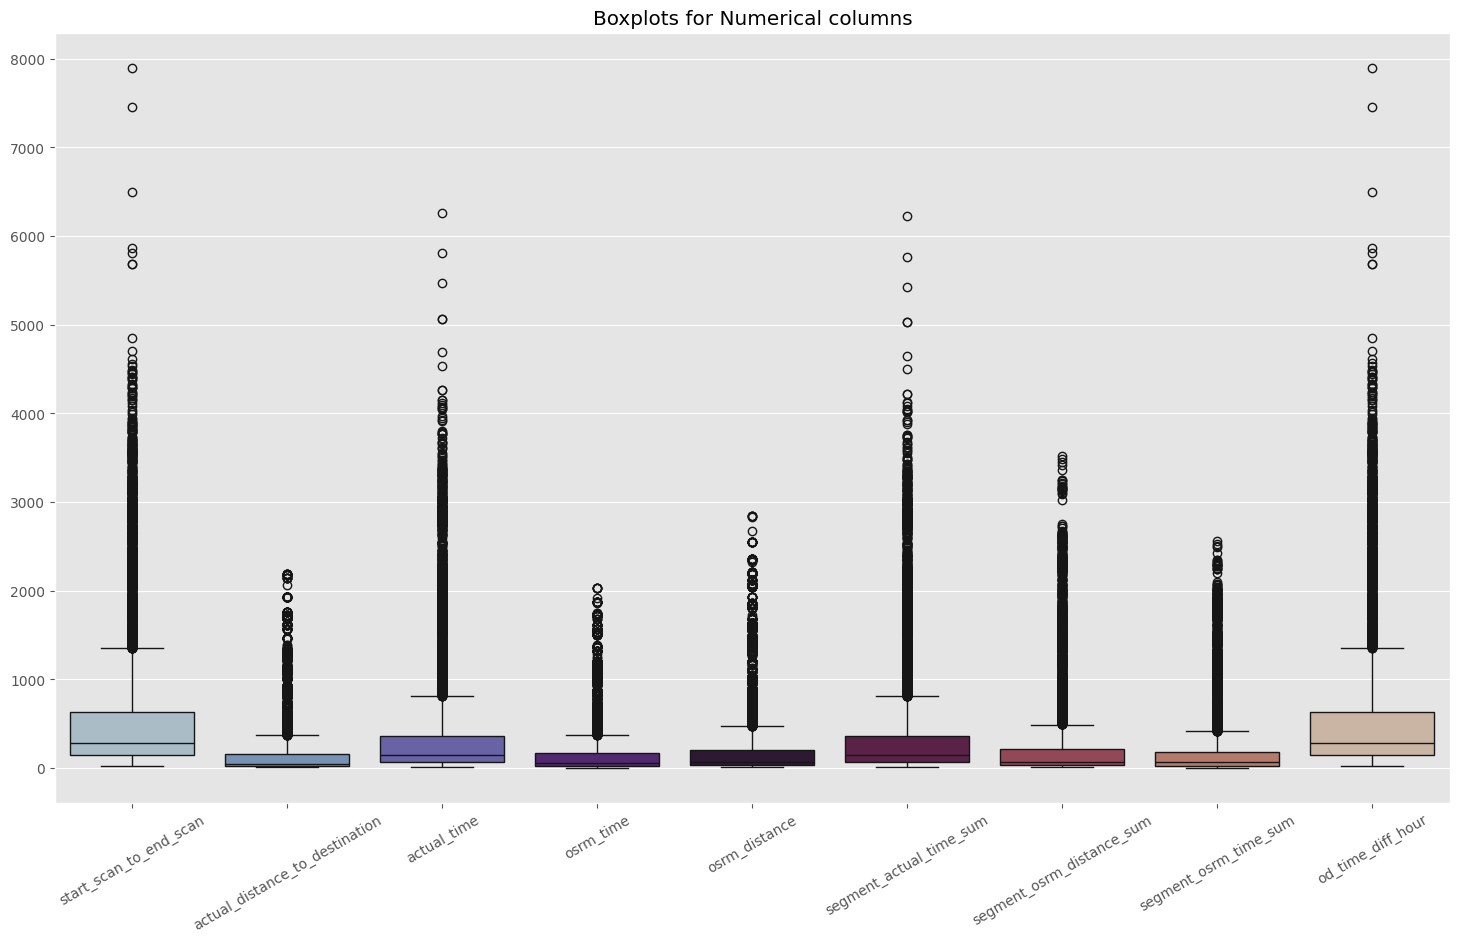

In [36]:
with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(18, 10))
  sns.boxplot(trip[num_cols], palette = 'twilight')
  plt.xticks(rotation=30)
  plt.title("Boxplots for Numerical columns")
  plt.show()

In [37]:
def remove_outliers(df, num_cols):
    df_clean = df.copy()

    # Create a mask to track rows to keep
    mask = pd.Series(True, index=df.index)

    for column in num_cols:
        # Calculate Q1, Q3, IQR, lower & upper bounds
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Update mask : This ensures that if column_mask had even 1 False, then our final mask will drop the row since it will also become False
        column_mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
        mask = mask & column_mask

    # Apply the mask to get an outlier free dataframe
    df_clean = df_clean[mask]

    # Print the number of outliers removed
    num_outliers = len(df) - len(df_clean)
    print(f"Number of rows removed: {num_outliers}")
    print(f"Shape before removing outliers: {df.shape}")
    print(f"Shape after removing outliers: {df_clean.shape}")

    return df_clean.reset_index(drop = True)

In [38]:
trip = remove_outliers(trip, num_cols)

Number of rows removed: 2064
Shape before removing outliers: (14787, 32)
Shape after removing outliers: (12723, 32)


In [39]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai hub,mumbai,none,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,bellary,bellary,none,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,tamil nadu,chennai,chrompet,dpc,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2
12719,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,haryana,fbd,balabhgarh,dpc,2018,10,23,3,40,2
12720,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2
12721,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tamil nadu,tirunelveli,vdkkusrt,i,2018,10,23,3,40,2


### Handling Categorical Features

In [40]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12723 entries, 0 to 12722
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            12723 non-null  category      
 1   trip_creation_time              12723 non-null  datetime64[ns]
 2   route_schedule_uuid             12723 non-null  object        
 3   route_type                      12723 non-null  category      
 4   trip_uuid                       12723 non-null  object        
 5   source_center                   12723 non-null  object        
 6   source_name                     12723 non-null  object        
 7   destination_center              12723 non-null  object        
 8   destination_name                12723 non-null  object        
 9   start_scan_to_end_scan          12723 non-null  float32       
 10  od_time_diff_hour               12723 non-null  float64       
 11  ac

In [41]:
trip['data'] = trip['data'].map({'test':0, 'training':1})
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

### Standardizing the numerical features

In [42]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [43]:
trip_scaled_num = scaler.transform(trip[num_cols])

In [44]:
trip_scaled_num = pd.DataFrame(trip_scaled_num, columns = num_cols)
trip_scaled_num

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


## Hypothesis Testing


### actual_time aggregated value and OSRM time aggregated value

**Formulation of the Null & Alternate Hypothesis**


The Null & Alternate hypothesis for our experiment can be framed as below.

- Ho = "The means of actual_time aggregated value and OSRM time aggregated value are not significantly different."
- Ha = "The means of actual_time aggregated value and OSRM time aggregated value are significantly different."

**Test Selection**
- Given the categorical-numerical nature of the analysis of our Random variables and the fact that we wish to know whether there exists a statistical relationship between the actual_time and the osrm_time for the trip, we can use a `Paired t-test` here.

**Significance Level**

- Considering our test, we can set significance level to be 5%.

In [45]:
alpha = 0.05

**Test Assumptions**

**_Test for Normality_**

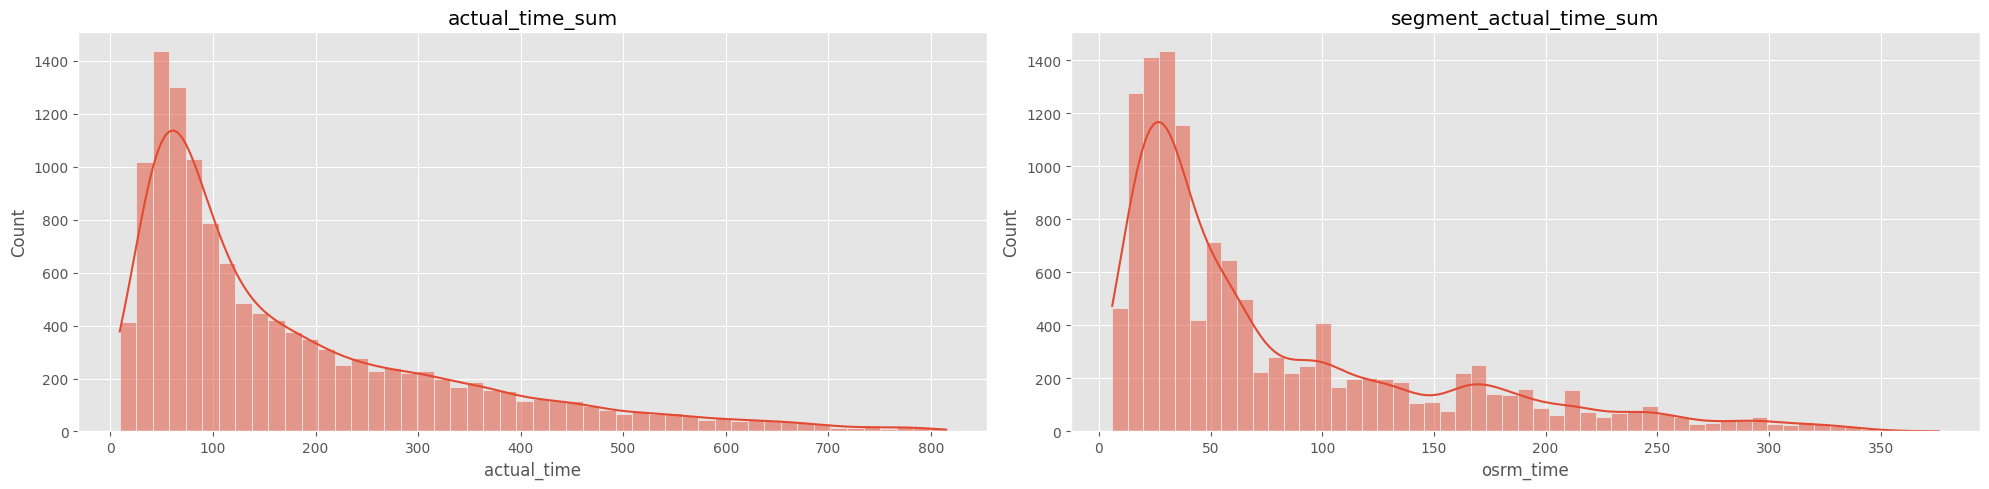

In [46]:
# Let's begin by plotting histplots of the sample data.
with plt.style.context('ggplot'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

  sns.histplot(data=trip['actual_time'], ax=ax1, kde = True)
  ax1.set_title('actual_time_sum')

  sns.histplot(data=trip['osrm_time'], ax=ax2, kde = True)
  ax2.set_title('segment_actual_time_sum')

  plt.tight_layout()
  plt.show()

From the looks of the histplots, the data does not seem to be of the Gaussian kind.

Let's plot qqplots to further check the normality.

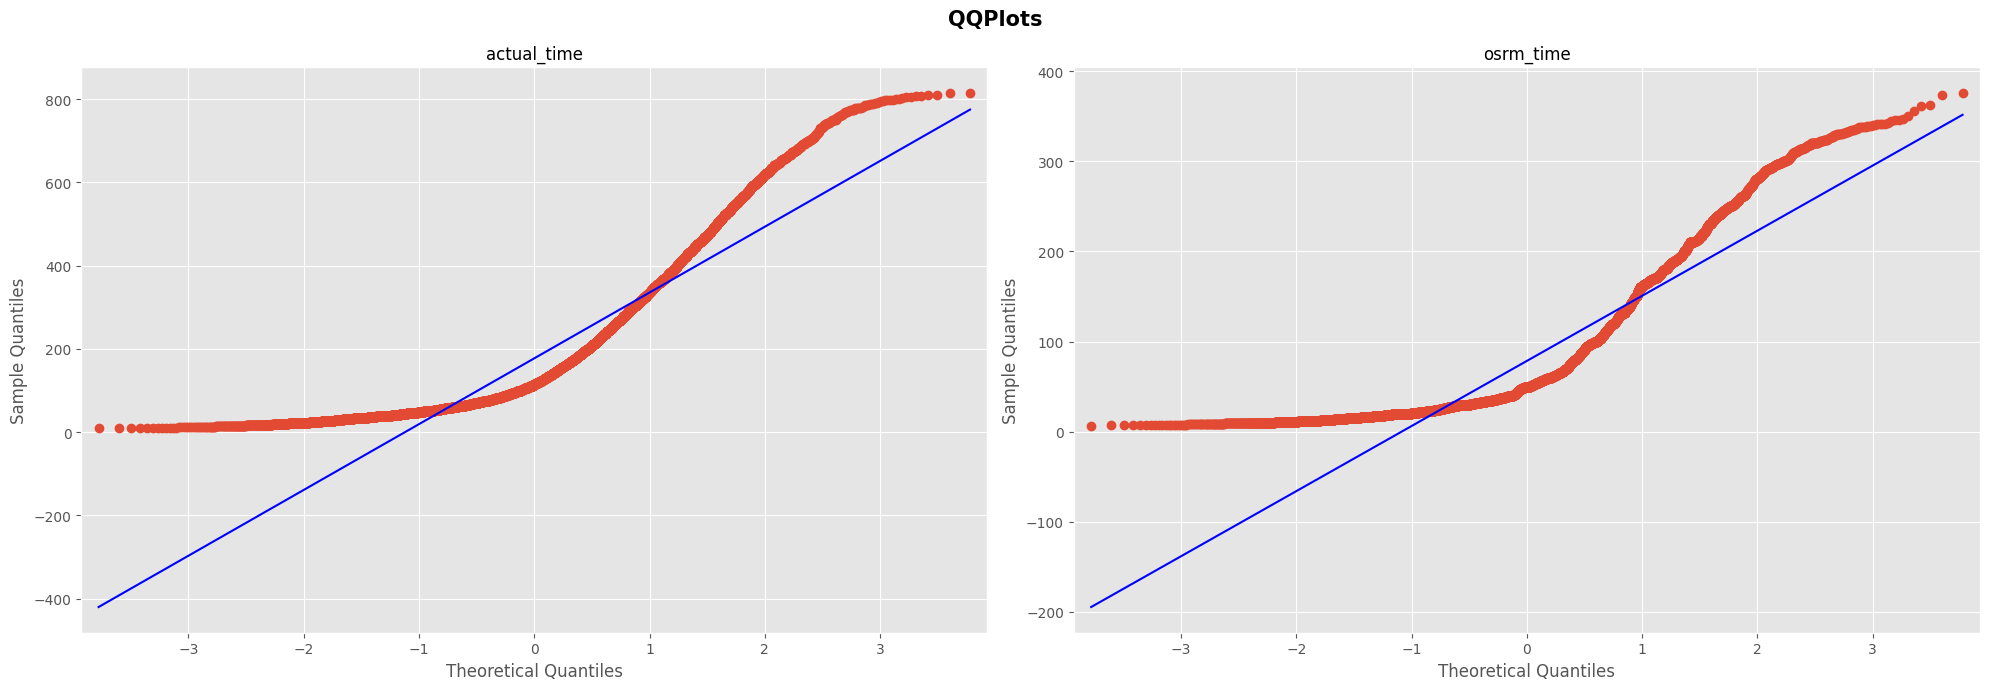

In [47]:
# Plotting qqplots for the time samples.

with plt.style.context('ggplot'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

  qqplot(trip['actual_time'], line = 's', ax = ax1)
  ax1.get_lines()[1].set_color("blue")
  ax1.set_title('actual_time', size = 12)

  qqplot(trip['osrm_time'], line = 's', ax = ax2)
  ax2.get_lines()[1].set_color("blue")
  ax2.set_title('osrm_time', size = 12)

  plt.suptitle("QQPlots", weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

Again, the time samples do not show normality.

Let us check for it statistically using the Shapiro-Wilk's test for normality.

In [48]:
# Shapiro-Wilk's Test for normality

# Ho : The data follows a gaussian distribution
# Ha : The data does not follow a gaussian distribution

test_stat, p_val = shapiro(trip['actual_time'])
print(f"actual_time :")
print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")

test_stat, p_val = shapiro(trip['osrm_time'])
print(f"osrm_time :")
print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")

actual_time :
Test statistic = 0.833, p-value = 4.183733752865259e-78
osrm_time :
Test statistic = 0.815, p-value = 2.477998215676191e-80


Since the p-values for both the time samples are almost infinitesimal, we can therefore conclude that both the time samples are not of the Gaussian distribution.

- The test assumption of normality of the samples has failed and hence we cannot proceed with a paired t-test or even an anova test. We shall therefore proceed with their non-parametric equivalent, i.e. the Mann-Whitney U rank test, for comparing two independent samples.

In [49]:
test_stat, p_value = mannwhitneyu(trip['actual_time'], trip['osrm_time'])
print('p-value', p_value)
if p_value < alpha:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.0
The samples are not similar


Therefore, we can conclude that the actual_time aggregated value and OSRM time aggregated value are not similar.

### actual_time aggregated value and segment actual time aggregated value

**Formulation of the Null & Alternate Hypothesis**


The Null & Alternate hypothesis for our experiment can be framed as below.

- Ho = "The means of actual_time aggregated value and segment_actual_time_sum aggregated value are not significantly different."
- Ha = "The means of actual_time aggregated value and segment_actual_time_sum aggregated value are significantly different."

**Test Selection**
- Given the categorical-numerical nature of the analysis of our Random variables and the fact that we wish to know whether there exists a statistical relationship between the actual_time and the osrm_time for the trip, we can use a `Paired t-test` here.

**Significance Level**

- Considering our test, we can set significance level to be 5%.

In [50]:
alpha = 0.05

**Test Assumptions**

**_Test for Normality_**

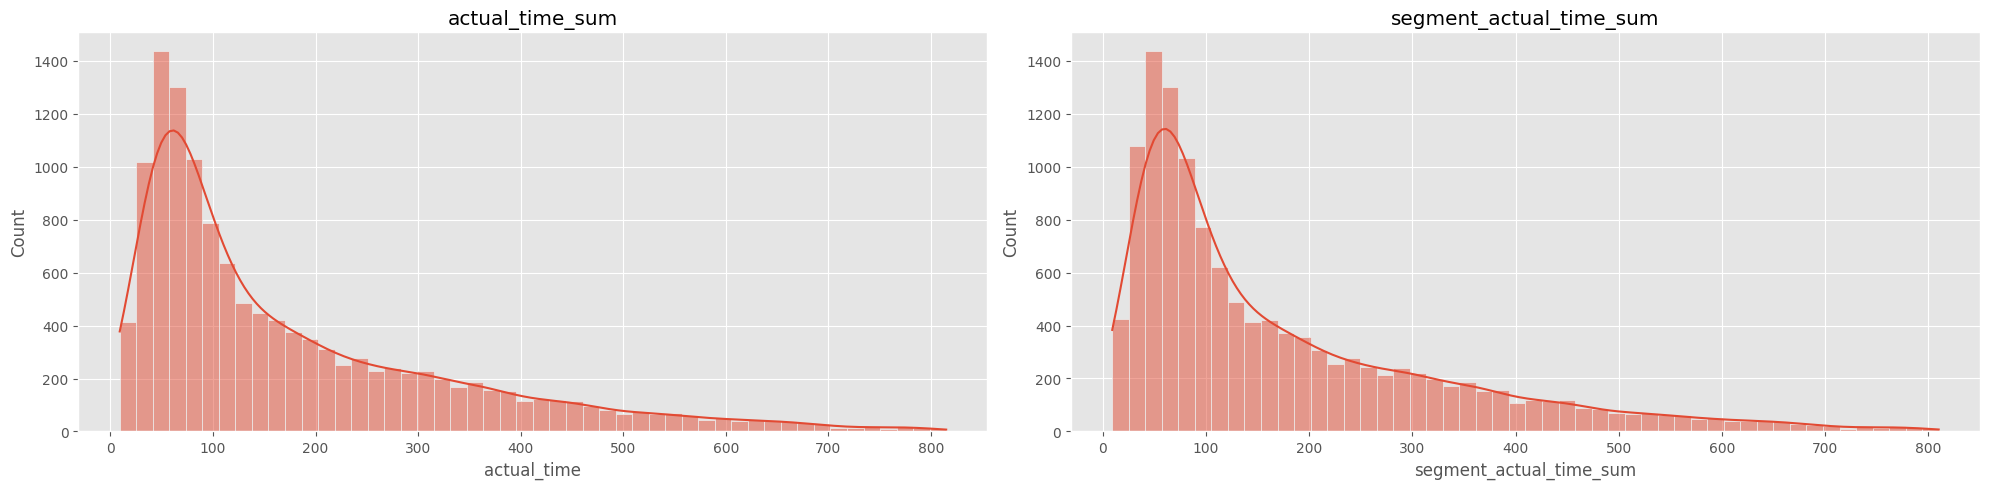

In [51]:
# Let's begin by plotting histplots of the sample data.
with plt.style.context('ggplot'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

  sns.histplot(data=trip['actual_time'], ax=ax1, kde = True)
  ax1.set_title('actual_time_sum')

  sns.histplot(data=trip['segment_actual_time_sum'], ax=ax2, kde = True)
  ax2.set_title('segment_actual_time_sum')

  plt.tight_layout()
  plt.show()

From the looks of the histplots, the data does not seem to be of the Gaussian kind.

Let's plot qqplots to further check the normality.

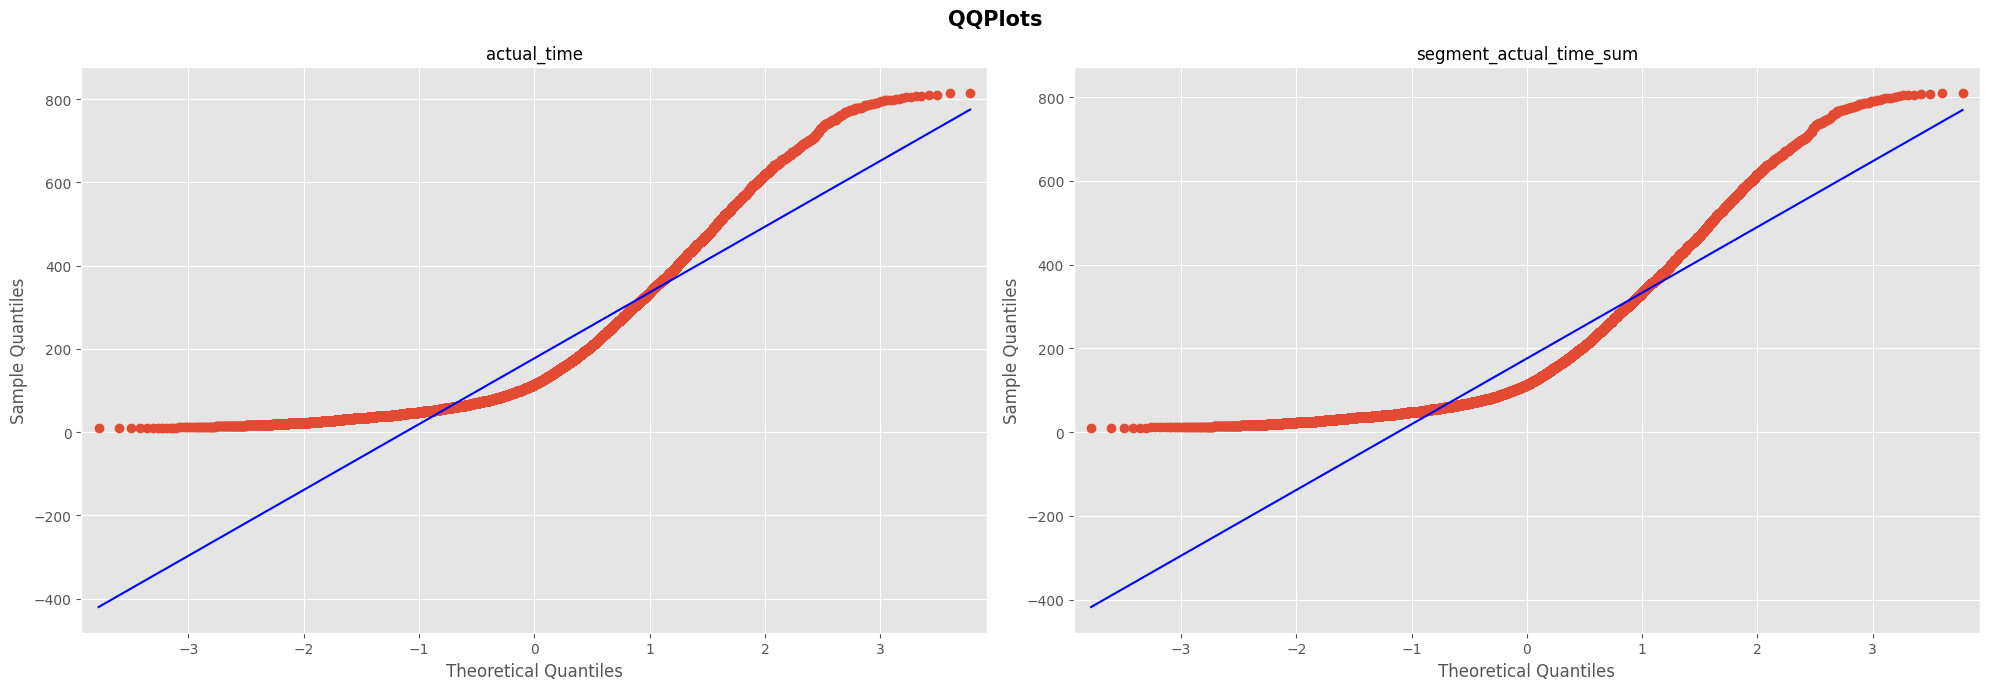

In [52]:
# Plotting qqplots for the time samples.

with plt.style.context('ggplot'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

  qqplot(trip['actual_time'], line = 's', ax = ax1)
  ax1.get_lines()[1].set_color("blue")
  ax1.set_title('actual_time', size = 12)

  qqplot(trip['segment_actual_time_sum'], line = 's', ax = ax2)
  ax2.get_lines()[1].set_color("blue")
  ax2.set_title('segment_actual_time_sum', size = 12)

  plt.suptitle("QQPlots", weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

Again, the time samples do not show normality.

Let us check for it statistically using the Shapiro-Wilk's test for normality.

In [53]:
# Shapiro-Wilk's Test for normality

# Ho : The data follows a gaussian distribution
# Ha : The data does not follow a gaussian distribution

test_stat, p_val = shapiro(trip['actual_time'])
print(f"actual_time :")
print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")

test_stat, p_val = shapiro(trip['segment_actual_time_sum'])
print(f"segment_actual_time_sum :")
print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")

actual_time :
Test statistic = 0.833, p-value = 4.183733752865259e-78
segment_actual_time_sum :
Test statistic = 0.832, p-value = 3.173272292217357e-78


Since the p-values for both the time samples are almost infinitesimal, we can therefore conclude that both the time samples are not of the Gaussian distribution.

- The test assumption of normality of the samples has failed and hence we cannot proceed with a paired t-test or even an anova test. We shall therefore proceed with their non-parametric equivalent, i.e. the Mann-Whitney U rank test, for comparing two independent samples.

In [54]:
test_stat, p_value = mannwhitneyu(trip['actual_time'], trip['segment_actual_time_sum'])
print('p-value', p_value)
if p_value < alpha:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.3342240274629089
The samples are similar 


Therefore, we can conclude that the actual_time aggregated value and segment_actual_time_sum aggregated value are not similar.

### OSRM distance aggregated value and segment OSRM distance aggregated value.

**Formulation of the Null & Alternate Hypothesis**


The Null & Alternate hypothesis for our experiment can be framed as below.

- Ho = "The means of osrm_distance aggregated value and segment_osrm_distance_sum aggregated value are not significantly different."
- Ha = "The means of osrm_distance aggregated value and segment_osrm_distance_sum aggregated value are significantly different."

**Test Selection**
- Given the categorical-numerical nature of the analysis of our Random variables and the fact that we wish to know whether there exists a statistical relationship between the osrm_distance and the segment_osrm_distance_sum for the trip, we can use a `Paired t-test` here.

**Significance Level**

- Considering our test, we can set significance level to be 5%.

In [55]:
alpha = 0.05

**Test Assumptions**

**_Test for Normality_**

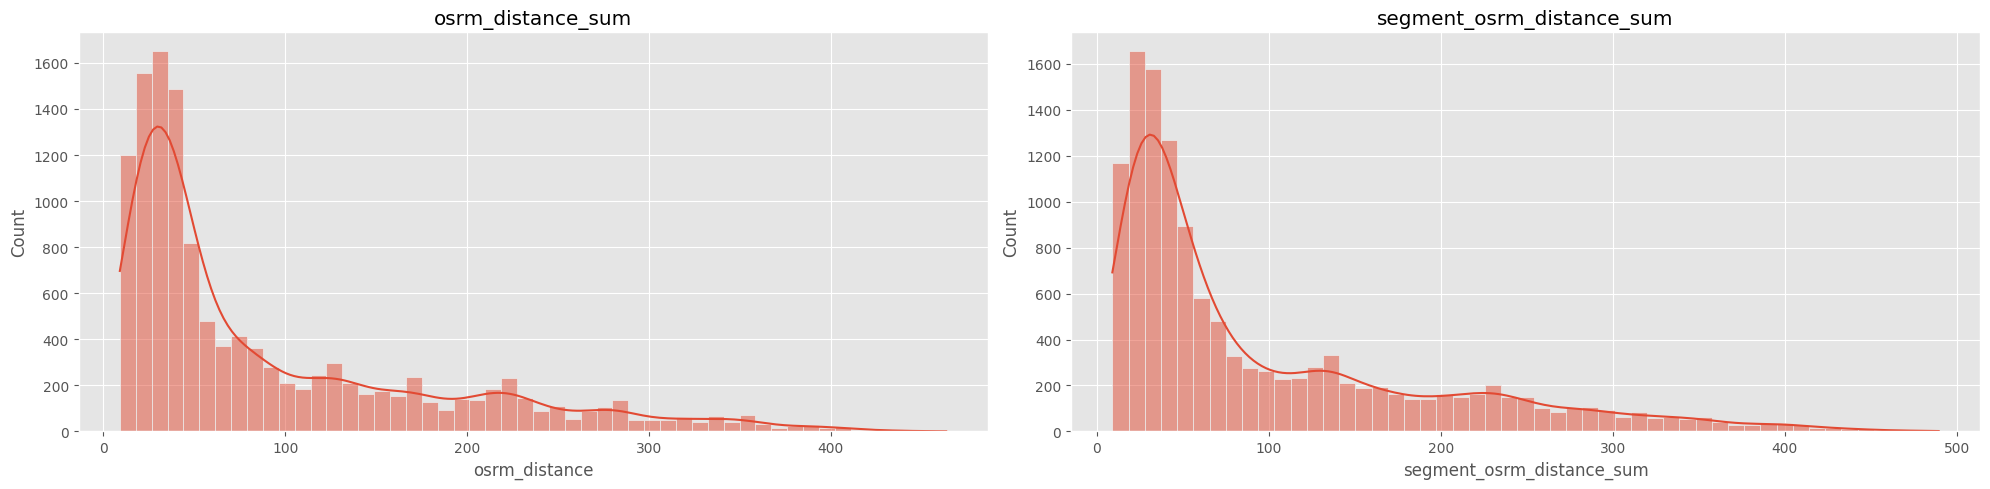

In [56]:
# Let's begin by plotting histplots of the sample data.
with plt.style.context('ggplot'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

  sns.histplot(data=trip['osrm_distance'], ax=ax1, kde = True)
  ax1.set_title('osrm_distance_sum')

  sns.histplot(data=trip['segment_osrm_distance_sum'], ax=ax2, kde = True)
  ax2.set_title('segment_osrm_distance_sum')

  plt.tight_layout()
  plt.show()

From the looks of the histplots, the data does not seem to be of the Gaussian kind.

Let's plot qqplots to further check the normality.

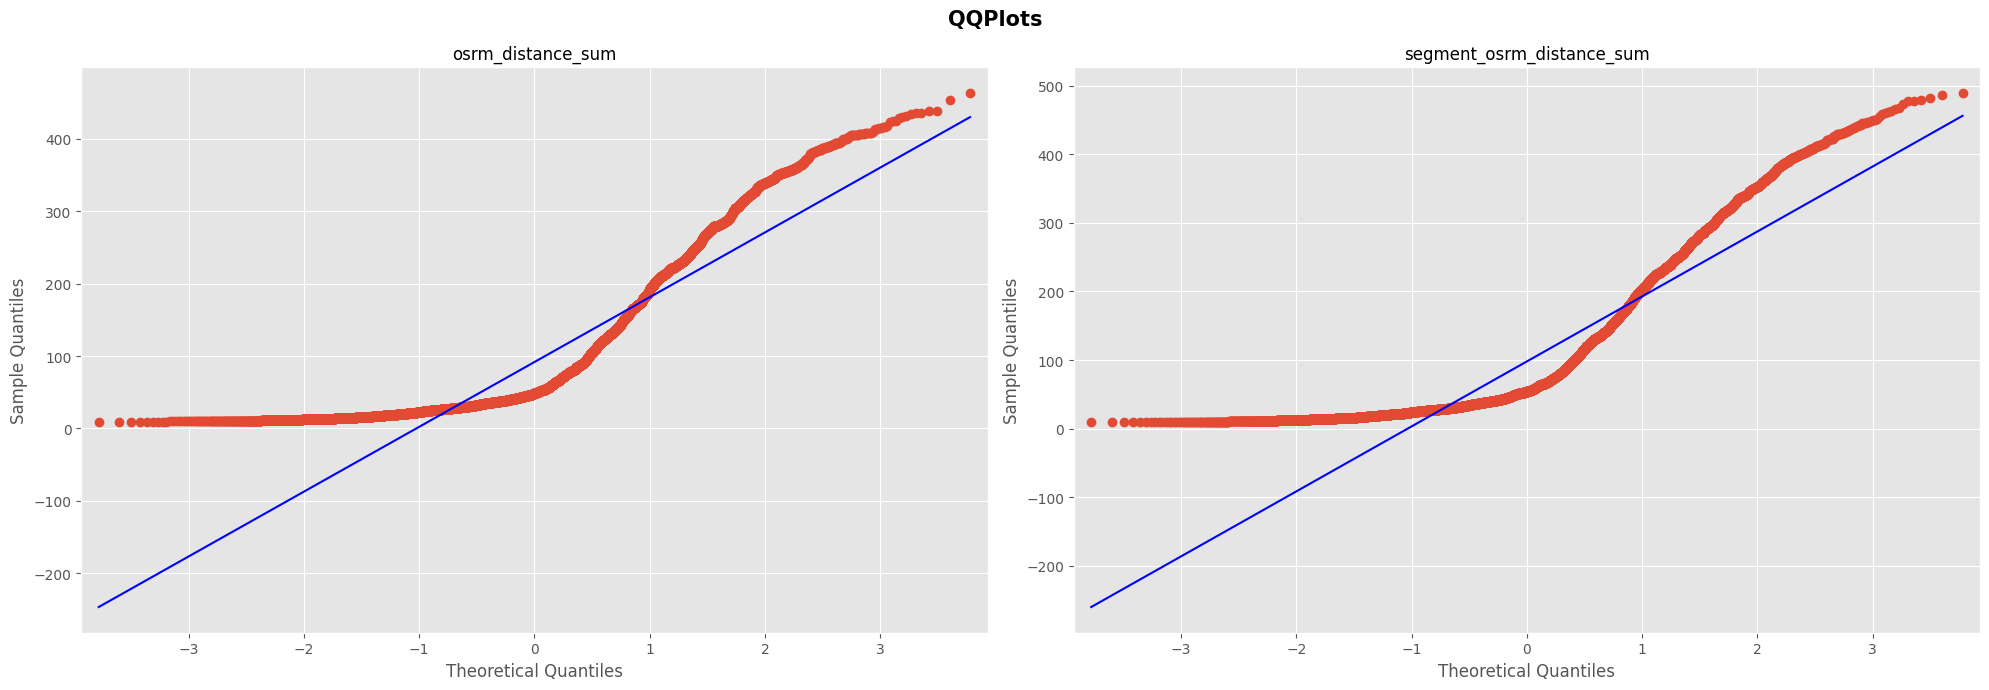

In [57]:
# Plotting qqplots for the distance samples.

with plt.style.context('ggplot'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

  qqplot(trip['osrm_distance'], line = 's', ax = ax1)
  ax1.get_lines()[1].set_color("blue")
  ax1.set_title('osrm_distance_sum', size = 12)

  qqplot(trip['segment_osrm_distance_sum'], line = 's', ax = ax2)
  ax2.get_lines()[1].set_color("blue")
  ax2.set_title('segment_osrm_distance_sum', size = 12)

  plt.suptitle("QQPlots", weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

Again, the time samples do not show normality.

Let us check for it statistically using the Shapiro-Wilk's test for normality.

In [58]:
# Shapiro-Wilk's Test for normality

# Ho : The data follows a gaussian distribution
# Ha : The data does not follow a gaussian distribution

test_stat, p_val = shapiro(trip['osrm_distance'])
print(f"osrm_distance :")
print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")

test_stat, p_val = shapiro(trip['segment_osrm_distance_sum'])
print(f"segment_osrm_distance_sum :")
print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")

osrm_distance :
Test statistic = 0.800, p-value = 4.1366403003751665e-82
segment_osrm_distance_sum :
Test statistic = 0.808, p-value = 3.4940196360395376e-81


Since the p-values for both the distance samples are almost infinitesimal, we can therefore conclude that both the distance samples are not of the Gaussian distribution.

- The test assumption of normality of the samples has failed and hence we cannot proceed with a paired t-test or even an anova test. We shall therefore proceed with their non-parametric equivalent, i.e. the Mann-Whitney U rank test, for comparing two independent samples.

In [59]:
test_stat, p_value = mannwhitneyu(trip['osrm_distance'], trip['segment_osrm_distance_sum'])
print('p-value', p_value)
if p_value < alpha:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 1.8349406474411988e-08
The samples are not similar


Therefore, we can conclude that the osrm_distance aggregated value and segment_osrm_distance_sum aggregated value are not similar.

### OSRM time aggregated value and segment OSRM time aggregated value.

**Formulation of the Null & Alternate Hypothesis**


The Null & Alternate hypothesis for our experiment can be framed as below.

- Ho = "The means of osrm_time aggregated value and segment_osrm_time_sum aggregated value are not significantly different."
- Ha = "The means of osrm_time aggregated value and segment_osrm_time_sum aggregated value are significantly different."

**Test Selection**
- Given the categorical-numerical nature of the analysis of our Random variables and the fact that we wish to know whether there exists a statistical relationship between the osrm_time and the segment_osrm_time_sum for the trip, we can use a `Paired t-test` here.

**Significance Level**

- Considering our test, we can set significance level to be 5%.

In [60]:
alpha = 0.05

**Test Assumptions**

**_Test for Normality_**

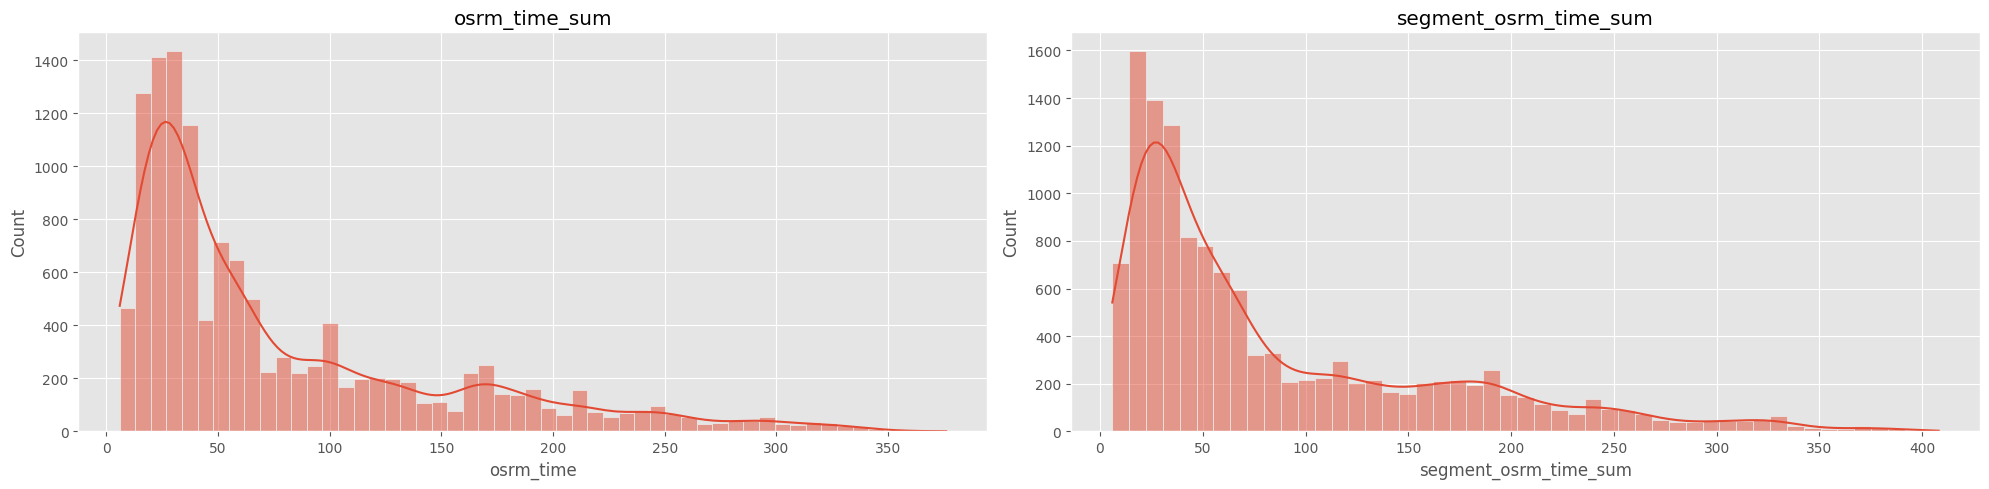

In [61]:
# Let's begin by plotting histplots of the sample data.
with plt.style.context('ggplot'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

  sns.histplot(data=trip['osrm_time'], ax=ax1, kde = True)
  ax1.set_title('osrm_time_sum')

  sns.histplot(data=trip['segment_osrm_time_sum'], ax=ax2, kde = True)
  ax2.set_title('segment_osrm_time_sum')

  plt.tight_layout()
  plt.show()

From the looks of the histplots, the data does not seem to be of the Gaussian kind.

Let's plot qqplots to further check the normality.

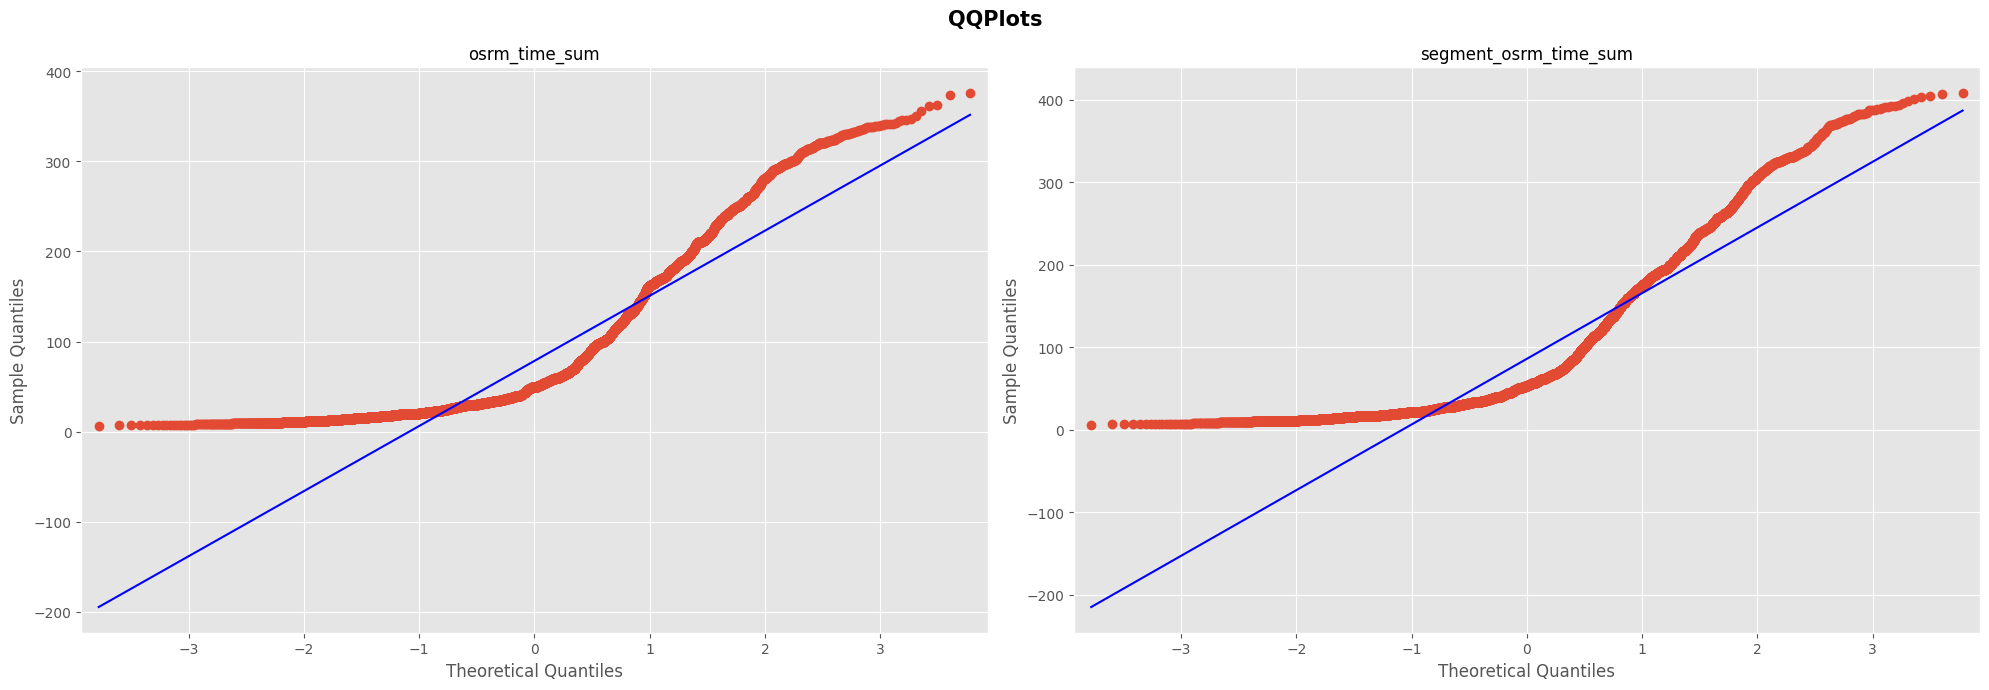

In [62]:
# Plotting qqplots for the time samples.

with plt.style.context('ggplot'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

  qqplot(trip['osrm_time'], line = 's', ax = ax1)
  ax1.get_lines()[1].set_color("blue")
  ax1.set_title('osrm_time_sum', size = 12)

  qqplot(trip['segment_osrm_time_sum'], line = 's', ax = ax2)
  ax2.get_lines()[1].set_color("blue")
  ax2.set_title('segment_osrm_time_sum', size = 12)

  plt.suptitle("QQPlots", weight = 'bold', size = 15)
  plt.tight_layout()
  plt.show()

Again, the time samples do not show normality.

Let us check for it statistically using the Shapiro-Wilk's test for normality.

In [63]:
# Shapiro-Wilk's Test for normality

# Ho : The data follows a gaussian distribution
# Ha : The data does not follow a gaussian distribution

test_stat, p_val = shapiro(trip['osrm_time'])
print(f"osrm_time :")
print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")

test_stat, p_val = shapiro(trip['segment_osrm_time_sum'])
print(f"segment_osrm_time_sum :")
print(f"Test statistic = {test_stat:.3f}, p-value = {p_val}")

osrm_time :
Test statistic = 0.815, p-value = 2.477998215676191e-80
segment_osrm_time_sum :
Test statistic = 0.823, p-value = 2.0784557588131095e-79


Since the p-values for both the time samples are almost infinitesimal, we can therefore conclude that both the time samples are not of the Gaussian distribution.

- The test assumption of normality of the samples has failed and hence we cannot proceed with a paired t-test or even an anova test. We shall therefore proceed with their non-parametric equivalent, i.e. the Mann-Whitney U rank test, for comparing two independent samples.

In [64]:
test_stat, p_value = mannwhitneyu(trip['osrm_time'], trip['segment_osrm_time_sum'])
print('p-value', p_value)
if p_value < alpha:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 3.7243838320849166e-10
The samples are not similar


Therefore, we can conclude that the osrm_time aggregated value and segment_osrm_time_sum aggregated value are not similar.